In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50

#Import from notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [4]:
!pip install import-ipynb

In [5]:
import import_ipynb
import MRNet_models_processing as processing

importing Jupyter notebook from MRNet_models_processing.ipynb


Using TensorFlow backend.


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
unzip:  cannot find or open /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip, /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip.zip or /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip.ZIP.


#Extractor (ResNet)

In [0]:
extractor_res = ResNet50(weights='imagenet' , input_shape=(256,256,3) , include_top = False)
extractor_res.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(1e-4),metrics=['acc'])

In [9]:
extractor_dense.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

#Train Classifiers

##Binary Classifier

In [0]:
def binary_classifier():  
  binary_class = keras.models.Sequential()
  binary_class.add(keras.layers.Dense(units=512 , activation = 'relu' , input_dim = 2048 ))
  binary_class.add(keras.layers.Dense(units=256 , activation = 'relu'))
  binary_class.add(keras.layers.Dense(units=1 , activation = 'sigmoid'))
  
  binary_class.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(1e-5),metrics=['acc'])
  return binary_class

## test classifiers

###test 1

Epoch 1/50
42/51 [=======================>......] - ETA: 0s - loss: 0.4941 - acc: 0.7952
Epoch 00001: val_acc improved from -inf to 0.82301, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 2s 47ms/step - loss: 0.4768 - acc: 0.7994 - val_loss: 0.4021 - val_acc: 0.8230
Epoch 2/50
42/51 [=======================>......] - ETA: 0s - loss: 0.3823 - acc: 0.8238
Epoch 00002: val_acc improved from 0.82301 to 0.83186, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.3823 - acc: 0.8230 - val_loss: 0.3746 - val_acc: 0.8319
Epoch 3/50
44/51 [========================>.....] - ETA: 0s - loss: 0.3486 - acc: 0.8432
Epoch 00003: val_acc did not improve from 0.83186
51/51 [==============================] - 0s 3ms/step - loss: 0.3529 - acc: 0.8427 - val_loss: 0.3614 - val_acc: 0.8230
Epoch 4/50
43/51 [======================

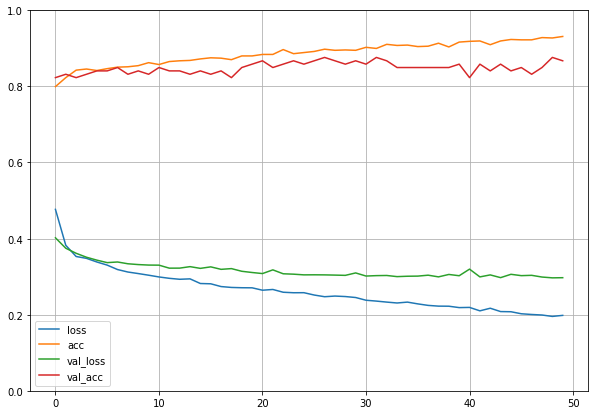

In [8]:
# neurons 512 then 256 and no dropouts
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.axial , processing.abnormal )

In [9]:
processing.test_classifier(extractor_dense, bin_class ,processing.axial , processing.abnormal)

NameError: ignored

###test 2

Epoch 1/50
45/51 [=========================>....] - ETA: 0s - loss: 1.4410 - acc: 0.7122
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 25ms/step - loss: 1.3826 - acc: 0.7168 - val_loss: 1.1044 - val_acc: 0.8053
Epoch 2/50
40/51 [======================>.......] - ETA: 0s - loss: 0.9553 - acc: 0.7437
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 0.9469 - acc: 0.7365 - val_loss: 0.5596 - val_acc: 0.7876
Epoch 3/50
41/51 [=======================>......] - ETA: 0s - loss: 0.7345 - acc: 0.7512
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 0.7397 - acc: 0.7502 - val_loss: 0.5157 - val_acc: 0.8053
Epoch 4/50
41/51 [=======================>......] - ETA: 0s - loss: 0.6655 - acc: 0.7463
Epoch 00004: val_acc did not improve from 0.80531

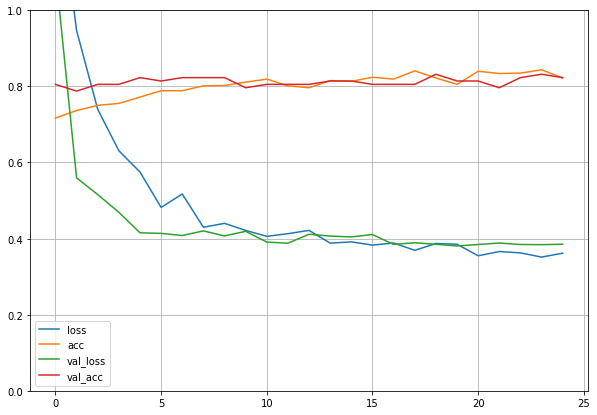

In [0]:
# neurons 512 then 256 and dropouts
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.abnormal )

In [0]:
processing.test_classifier(extractor_dense, bin_class ,processing.axial , processing.abnormal)

4/4 [==============================] - 0s 5ms/step - loss: 0.5052 - acc: 0.8417


[0.5052011013031006, 0.8416666388511658]

###test 3

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 1.4339 - acc: 0.7089
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 29ms/step - loss: 1.4339 - acc: 0.7089 - val_loss: 0.8327 - val_acc: 0.8053
Epoch 2/50
40/51 [======================>.......] - ETA: 0s - loss: 0.9554 - acc: 0.7225
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 0.9420 - acc: 0.7316 - val_loss: 0.7469 - val_acc: 0.8053
Epoch 3/50
50/51 [============================>.] - ETA: 0s - loss: 0.7223 - acc: 0.7520
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 0.7246 - acc: 0.7483 - val_loss: 0.4697 - val_acc: 0.8053
Epoch 4/50
50/51 [============================>.] - ETA: 0s - loss: 0.5780 - acc: 0.7740
Epoch 00004: val_acc did not improve from 0.80531

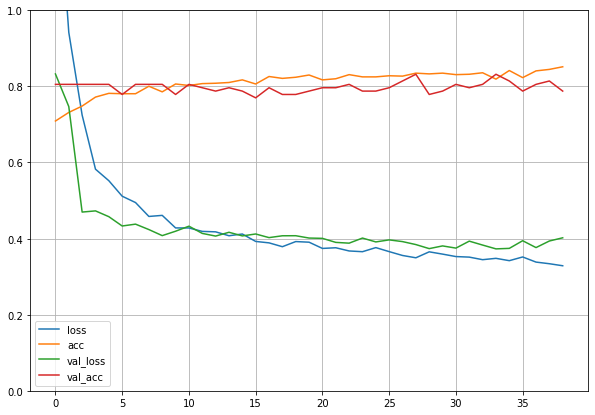

In [0]:
# neurons 512 then 256 and dropouts  lr_extractor = -2
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.abnormal )

In [0]:
processing.test_classifier(extractor_dense, bin_class ,processing.axial , processing.abnormal)

4/4 [==============================] - 0s 4ms/step - loss: 0.4784 - acc: 0.8000


[0.47835642099380493, 0.800000011920929]

###test 4

Epoch 1/50
39/51 [=====================>........] - ETA: 0s - loss: 1.7838 - acc: 0.7000
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 27ms/step - loss: 1.8674 - acc: 0.7011 - val_loss: 1.1627 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 1.2882 - acc: 0.6903
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 1.2882 - acc: 0.6903 - val_loss: 1.0469 - val_acc: 0.8053
Epoch 3/50
39/51 [=====================>........] - ETA: 0s - loss: 1.3429 - acc: 0.6974
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 1.3268 - acc: 0.6991 - val_loss: 0.9962 - val_acc: 0.8053
Epoch 4/50
48/51 [===========================>..] - ETA: 0s - loss: 1.1636 - acc: 0.7000
Epoch 00004: val_acc did not improve from 0.80531

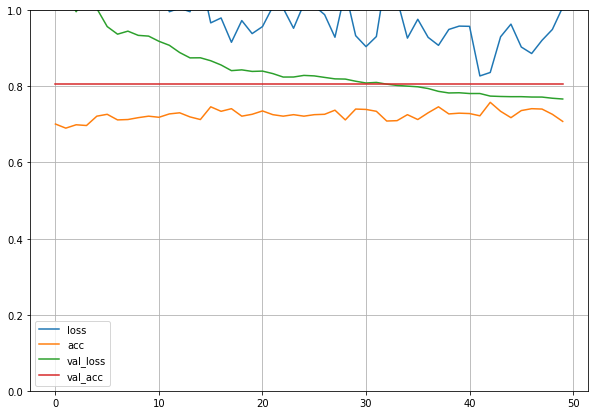

In [0]:
# neurons 512 then 256 and dropouts  lr_class = -4  , decay = 0.1
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.abnormal )

In [0]:
processing.test_classifier(extractor_dense, bin_class ,processing.axial , processing.abnormal)

4/4 [==============================] - 0s 4ms/step - loss: 0.4784 - acc: 0.8000


[0.47835642099380493, 0.800000011920929]

###test 5

Epoch 1/50
50/51 [============================>.] - ETA: 0s - loss: 4.3823 - acc: 0.7160
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 29ms/step - loss: 4.3196 - acc: 0.7168 - val_loss: 0.4649 - val_acc: 0.8053
Epoch 2/50
41/51 [=======================>......] - ETA: 0s - loss: 0.5436 - acc: 0.7890
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 0.5430 - acc: 0.7906 - val_loss: 0.4915 - val_acc: 0.8053
Epoch 3/50
42/51 [=======================>......] - ETA: 0s - loss: 0.4898 - acc: 0.7940
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 0.4714 - acc: 0.8024 - val_loss: 0.4607 - val_acc: 0.8053
Epoch 4/50
40/51 [======================>.......] - ETA: 0s - loss: 0.4927 - acc: 0.7987
Epoch 00004: val_acc did not improve from 0.80531

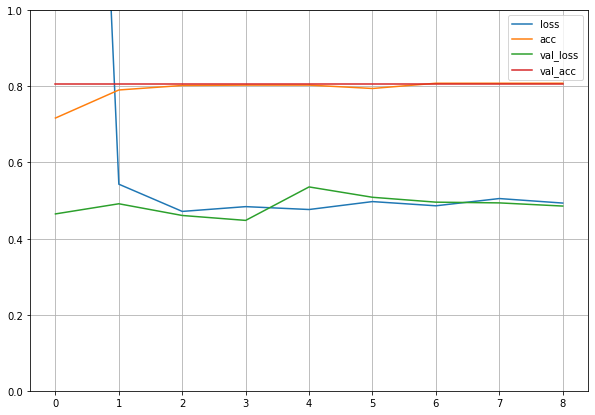

In [0]:
# neurons 512 then 256 and dropouts  lr_class = -2 
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.abnormal )

In [0]:
processing.test_classifier(extractor_dense, bin_class ,processing.axial , processing.abnormal)

4/4 [==============================] - 0s 4ms/step - loss: 0.5470 - acc: 0.7917


[0.5470077991485596, 0.7916666865348816]

###test 6

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 1.4169 - acc: 0.6824
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 27ms/step - loss: 1.4169 - acc: 0.6824 - val_loss: 0.7334 - val_acc: 0.8053
Epoch 2/50
40/51 [======================>.......] - ETA: 0s - loss: 1.2647 - acc: 0.7138
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 1.3216 - acc: 0.7168 - val_loss: 0.8057 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 1.2616 - acc: 0.7306
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 6ms/step - loss: 1.2616 - acc: 0.7306 - val_loss: 0.6947 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 1.3356 - acc: 0.7109
Epoch 00004: val_acc did not improve from 0.80531

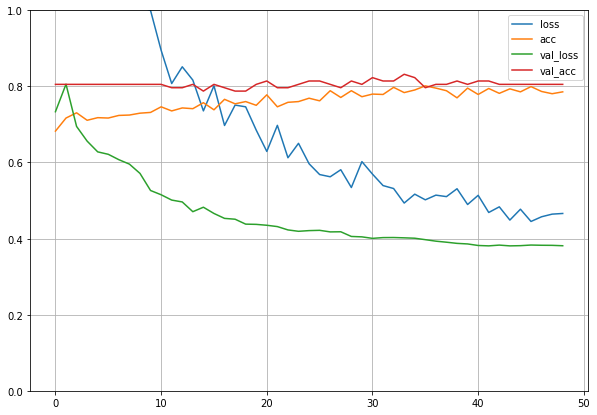

In [0]:
# neurons 512 then 256 and dropouts  lr_class = -5 
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.abnormal )

In [0]:
processing.test_classifier(extractor_dense, bin_class ,processing.axial , processing.abnormal)

4/4 [==============================] - 0s 3ms/step - loss: 0.4635 - acc: 0.8250


[0.46351706981658936, 0.824999988079071]

###test 7

Epoch 1/50
43/51 [========================>.....] - ETA: 0s - loss: 0.6318 - acc: 0.7128
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 2s 30ms/step - loss: 0.6185 - acc: 0.7188 - val_loss: 0.4740 - val_acc: 0.8053
Epoch 2/50
41/51 [=======================>......] - ETA: 0s - loss: 0.4516 - acc: 0.8012
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 0.4419 - acc: 0.8073 - val_loss: 0.4458 - val_acc: 0.7965
Epoch 3/50
48/51 [===========================>..] - ETA: 0s - loss: 0.4128 - acc: 0.8083
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 0.4109 - acc: 0.8092 - val_loss: 0.4354 - val_acc: 0.8053
Epoch 4/50
43/51 [========================>.....] - ETA: 0s - loss: 0.3954 - acc: 0.8140
Epoch 00004: val_acc improved from 0.80531 to 0.8

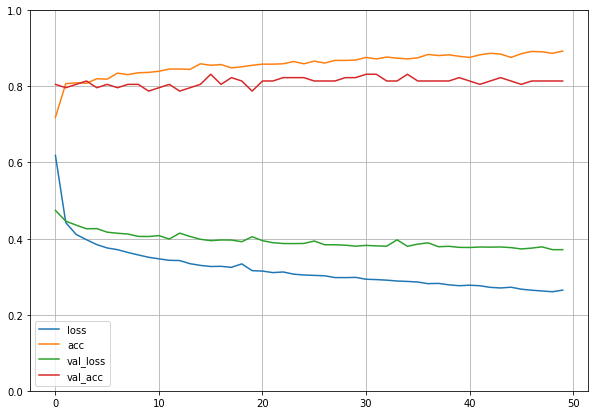

In [0]:
# neurons 512 then 256 and no dropouts  lr_class = -5 
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.abnormal )

In [0]:
processing.test_classifier(extractor_dense , processing.load_model(processing.densenet,processing.axial,processing.abnormal,processing.classifier ) ,processing.axial , processing.abnormal )

4/4 [==============================] - 0s 4ms/step - loss: 0.4184 - acc: 0.8250


[0.41843923926353455, 0.824999988079071]

###test 8

Epoch 1/50
46/51 [==========================>...] - ETA: 0s - loss: 2.6025 - acc: 0.5587
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 0s 9ms/step - loss: 2.6202 - acc: 0.5634 - val_loss: 0.7537 - val_acc: 0.8053
Epoch 2/50
38/51 [=====================>........] - ETA: 0s - loss: 2.0027 - acc: 0.6513
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 2.1028 - acc: 0.6460 - val_loss: 1.1099 - val_acc: 0.8053
Epoch 3/50
43/51 [========================>.....] - ETA: 0s - loss: 1.8811 - acc: 0.6791
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 1.9065 - acc: 0.6834 - val_loss: 1.2238 - val_acc: 0.8053
Epoch 4/50
49/51 [===========================>..] - ETA: 0s - loss: 1.7043 - acc: 0.6969
Epoch 00004: val_acc did not improve from 0.80531


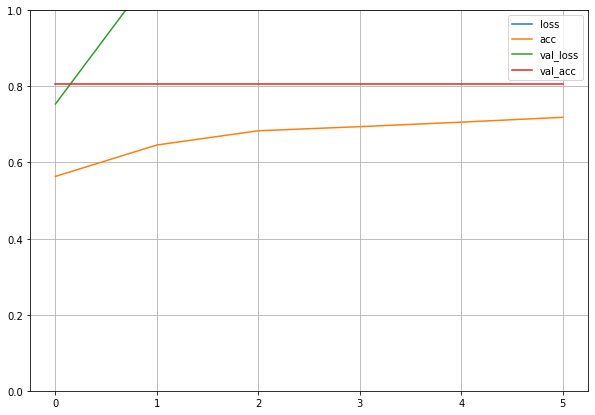

In [0]:
# neurons 256 then 128 and dropouts  lr_class = -5 
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.abnormal )

In [0]:
processing.test_classifier(extractor_dense , processing.load_model(processing.densenet,processing.axial,processing.abnormal,processing.classifier ) ,processing.axial , processing.abnormal )

4/4 [==============================] - 0s 3ms/step - loss: 0.8557 - acc: 0.7917


[0.8556826114654541, 0.7916666865348816]

###test 9

Epoch 1/50
49/51 [===========================>..] - ETA: 0s - loss: 1.5888 - acc: 0.7092
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 15ms/step - loss: 1.5756 - acc: 0.7099 - val_loss: 0.6860 - val_acc: 0.8053
Epoch 2/50
47/51 [==========================>...] - ETA: 0s - loss: 1.2283 - acc: 0.7191
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 1.2770 - acc: 0.7139 - val_loss: 0.6964 - val_acc: 0.8053
Epoch 3/50
49/51 [===========================>..] - ETA: 0s - loss: 1.3332 - acc: 0.7082
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 1.3250 - acc: 0.7119 - val_loss: 0.5935 - val_acc: 0.8053
Epoch 4/50
48/51 [===========================>..] - ETA: 0s - loss: 1.0160 - acc: 0.7552
Epoch 00004: val_acc did not improve from 0.80531

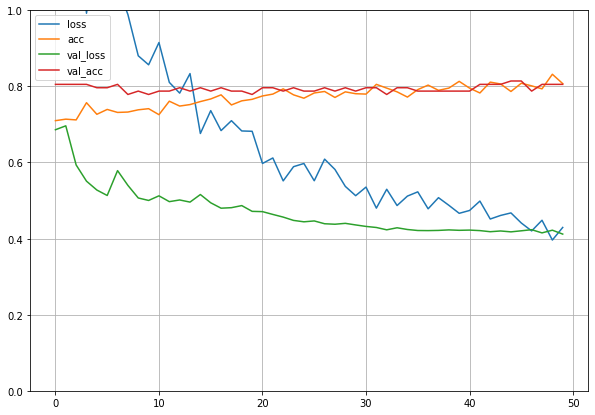

In [0]:
# neurons 1024 then 512 and dropouts  lr_class = -5 
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.abnormal )

In [0]:
processing.test_classifier(extractor_dense , processing.load_model(processing.densenet,processing.axial,processing.abnormal,processing.classifier ) ,processing.axial , processing.abnormal )

4/4 [==============================] - 0s 4ms/step - loss: 0.4767 - acc: 0.8167


[0.4767455756664276, 0.8166666626930237]

###test 10

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 11.1669 - acc: 0.6018
Epoch 00001: val_acc improved from -inf to 0.78761, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 16ms/step - loss: 11.1669 - acc: 0.6018 - val_loss: 10.6415 - val_acc: 0.7876
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 10.5528 - acc: 0.8024
Epoch 00002: val_acc did not improve from 0.78761
51/51 [==============================] - 0s 5ms/step - loss: 10.5528 - acc: 0.8024 - val_loss: 10.4375 - val_acc: 0.7788
Epoch 3/50
45/51 [=========================>....] - ETA: 0s - loss: 10.3652 - acc: 0.8011
Epoch 00003: val_acc improved from 0.78761 to 0.80531, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 0s 7ms/step - loss: 10.3586 - acc: 0.8004 - val_loss: 10.2712 - val_acc: 0.8053
Epoch 4/50
45/51 [=====================

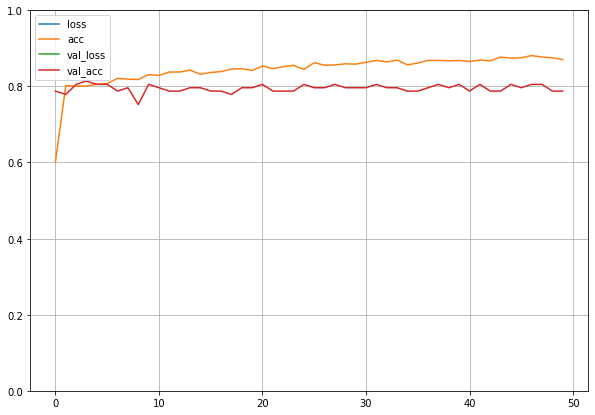

In [0]:
# neurons 512 then 256 and no dropouts  lr_class = -5 with regularization 
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.abnormal )

In [0]:
processing.test_classifier(extractor_dense , processing.load_model(processing.densenet,processing.axial,processing.abnormal,processing.classifier ) ,processing.axial , processing.abnormal )

4/4 [==============================] - 0s 3ms/step - loss: 10.1786 - acc: 0.8000


[10.178627967834473, 0.800000011920929]

###test 11

Epoch 1/50
42/51 [=======================>......] - ETA: 0s - loss: 0.6811 - acc: 0.5726
Epoch 00001: val_acc improved from -inf to 0.73451, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 0s 9ms/step - loss: 0.6513 - acc: 0.6087 - val_loss: 0.5461 - val_acc: 0.7345
Epoch 2/50
43/51 [========================>.....] - ETA: 0s - loss: 0.5022 - acc: 0.7860
Epoch 00002: val_acc improved from 0.73451 to 0.79646, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.4927 - acc: 0.7896 - val_loss: 0.4940 - val_acc: 0.7965
Epoch 3/50
38/51 [=====================>........] - ETA: 0s - loss: 0.4791 - acc: 0.7987
Epoch 00003: val_acc improved from 0.79646 to 0.80531, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.4667 - acc: 0.8

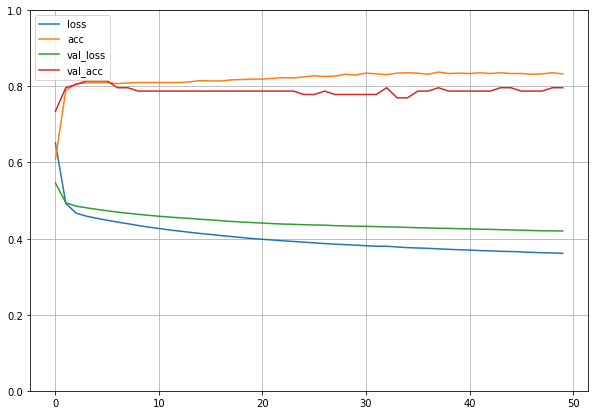

In [0]:
# neurons 512 then 256 and no dropouts  lr_class = -6
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.abnormal )

In [0]:
processing.test_classifier(extractor_dense , processing.load_model(processing.densenet,processing.axial,processing.abnormal,processing.classifier ) ,processing.axial , processing.abnormal )

4/4 [==============================] - 0s 3ms/step - loss: 0.5187 - acc: 0.8000


[0.5187181234359741, 0.800000011920929]

## Axial Abnormal

Epoch 1/50
37/51 [====================>.........] - ETA: 0s - loss: 0.5044 - acc: 0.7851
Epoch 00001: val_acc improved from -inf to 0.79646, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 21ms/step - loss: 0.4783 - acc: 0.7965 - val_loss: 0.4487 - val_acc: 0.7965
Epoch 2/50
41/51 [=======================>......] - ETA: 0s - loss: 0.3768 - acc: 0.8329
Epoch 00002: val_acc improved from 0.79646 to 0.82301, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 0s 8ms/step - loss: 0.3859 - acc: 0.8240 - val_loss: 0.4088 - val_acc: 0.8230
Epoch 3/50
43/51 [========================>.....] - ETA: 0s - loss: 0.3584 - acc: 0.8384
Epoch 00003: val_acc did not improve from 0.82301
51/51 [==============================] - 0s 3ms/step - loss: 0.3557 - acc: 0.8348 - val_loss: 0.3837 - val_acc: 0.8053
Epoch 4/50
42/51 [======================

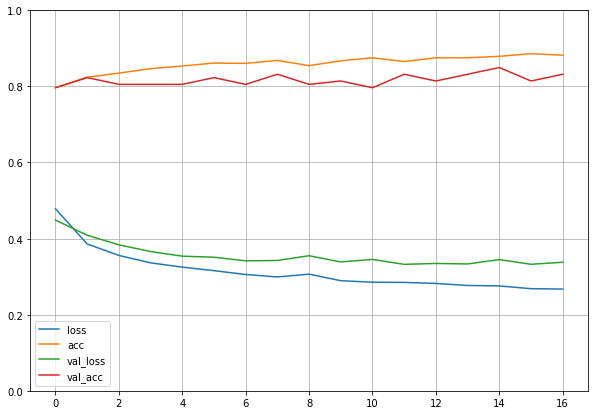

In [30]:
# neurons 512 then 256 and no dropouts  lr_class = -5 
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.axial , processing.abnormal )

In [31]:
processing.test_classifier(extractor_res , processing.load_model(processing.trans_resnet,processing.axial,processing.abnormal,processing.classifier ) ,processing.axial , processing.abnormal )

4/4 [==============================] - 0s 2ms/step - loss: 0.3410 - acc: 0.8500


[0.3409816324710846, 0.8500000238418579]

##Random tests

Epoch 1/50
39/51 [=====================>........] - ETA: 0s - loss: 0.9569 - acc: 0.7295
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 2s 41ms/step - loss: 0.9267 - acc: 0.7286 - val_loss: 0.4965 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.7439 - acc: 0.7394
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 4ms/step - loss: 0.7439 - acc: 0.7394 - val_loss: 0.4693 - val_acc: 0.8053
Epoch 3/50
50/51 [============================>.] - ETA: 0s - loss: 0.6355 - acc: 0.7640
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 4ms/step - loss: 0.6375 - acc: 0.7620 - val_loss: 0.4313 - val_acc: 0.7965
Epoch 4/50
40/51 [======================>.......] - ETA: 0s - loss: 0.6477 - acc: 0.7500
Epoch 00004: val_acc did not improve from 0.8

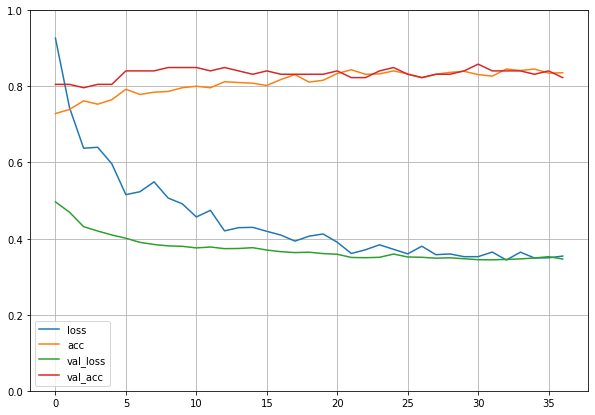

In [14]:
# neurons 512 then 256 and dropouts 0.5  lr_class = -5 
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.axial , processing.abnormal )

In [15]:
processing.test_classifier(extractor_res , processing.load_model(processing.trans_resnet,processing.axial,processing.abnormal,processing.classifier ) ,processing.axial , processing.abnormal )

4/4 [==============================] - 0s 3ms/step - loss: 0.4083 - acc: 0.8333


[0.4083431661128998, 0.8333333134651184]

Epoch 1/50
41/51 [=======================>......] - ETA: 0s - loss: 0.9486 - acc: 0.5927
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 2s 43ms/step - loss: 0.8864 - acc: 0.6352 - val_loss: 0.5919 - val_acc: 0.8053
Epoch 2/50
37/51 [====================>.........] - ETA: 0s - loss: 0.5816 - acc: 0.7716
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.5639 - acc: 0.7768 - val_loss: 0.4743 - val_acc: 0.8053
Epoch 3/50
39/51 [=====================>........] - ETA: 0s - loss: 0.4981 - acc: 0.7692
Epoch 00003: val_acc improved from 0.80531 to 0.81416, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.4914 - acc: 0.7738 - val_loss: 0.4316 - val_acc: 0.8142
Epoch 4/50
41/51 [======================

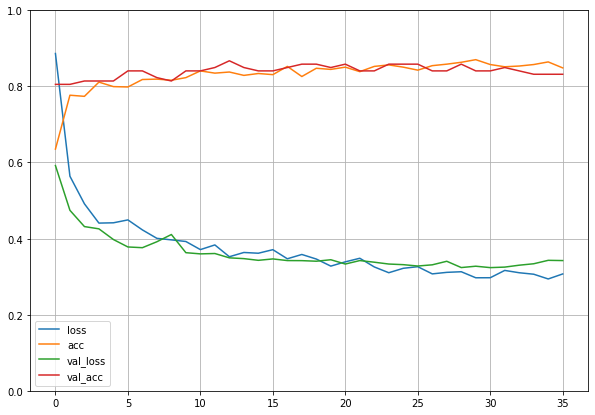

In [18]:
# neurons 512 then 256 and dropouts 0.5  lr_class = -5 
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.axial , processing.abnormal )

In [19]:
processing.test_classifier(extractor_res , processing.load_model(processing.trans_resnet,processing.axial,processing.abnormal,processing.classifier ) ,processing.axial , processing.abnormal )

4/4 [==============================] - 0s 3ms/step - loss: 0.4338 - acc: 0.8333


[0.43376556038856506, 0.8333333134651184]

## Axial Acl

Epoch 1/50
42/51 [=======================>......] - ETA: 0s - loss: 0.5204 - acc: 0.8036
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_acl.h5
51/51 [==============================] - 1s 21ms/step - loss: 0.5035 - acc: 0.8112 - val_loss: 0.4398 - val_acc: 0.8496
Epoch 2/50
43/51 [========================>.....] - ETA: 0s - loss: 0.4720 - acc: 0.8140
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.4719 - acc: 0.8151 - val_loss: 0.4622 - val_acc: 0.8496
Epoch 3/50
39/51 [=====================>........] - ETA: 0s - loss: 0.4432 - acc: 0.8128
Epoch 00003: val_acc improved from 0.84956 to 0.85841, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_acl.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.4408 - acc: 0.8151 - val_loss: 0.4376 - val_acc: 0.8584
Epoch 4/50
50/51 [============================>.] 

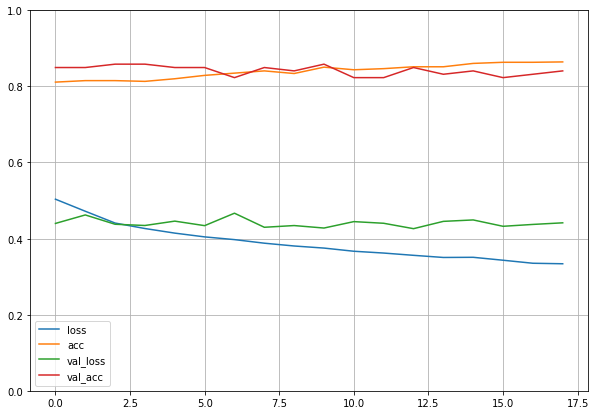

In [32]:
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.axial , processing.acl )

In [33]:
processing.test_classifier(extractor_res, processing.load_model(processing.trans_resnet,processing.axial,processing.acl,processing.classifier ) ,processing.axial , processing.acl)

4/4 [==============================] - 0s 3ms/step - loss: 0.8005 - acc: 0.5583


[0.8004680871963501, 0.5583333373069763]

##random tests

Epoch 1/50
49/51 [===========================>..] - ETA: 0s - loss: 0.5625 - acc: 0.7765
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_acl.h5
51/51 [==============================] - 1s 20ms/step - loss: 0.5525 - acc: 0.7807 - val_loss: 0.4324 - val_acc: 0.8496
Epoch 2/50
38/51 [=====================>........] - ETA: 0s - loss: 0.4441 - acc: 0.8105
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.4413 - acc: 0.8161 - val_loss: 0.4260 - val_acc: 0.8407
Epoch 3/50
41/51 [=======================>......] - ETA: 0s - loss: 0.4149 - acc: 0.8378
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.4047 - acc: 0.8378 - val_loss: 0.4996 - val_acc: 0.7699
Epoch 4/50
42/51 [=======================>......] - ETA: 0s - loss: 0.3620 - acc: 0.8512
Epoch 00004: val_acc did not improve from 0.84956


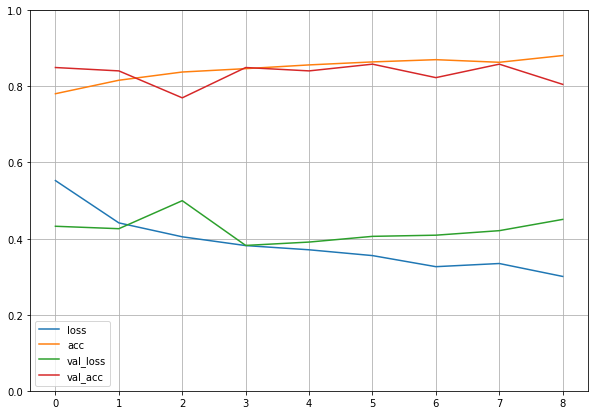

In [27]:
#lr = 0.0001
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.axial , processing.acl )

In [28]:
processing.test_classifier(extractor_res, processing.load_model(processing.trans_resnet,processing.axial,processing.acl,processing.classifier ) ,processing.axial , processing.acl)

4/4 [==============================] - 0s 4ms/step - loss: 0.7649 - acc: 0.6250


[0.7648979425430298, 0.625]

## Axial Meniscal

Epoch 1/50
42/51 [=======================>......] - ETA: 0s - loss: 0.6454 - acc: 0.6107
Epoch 00001: val_acc improved from -inf to 0.67257, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_meniscus.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.6323 - acc: 0.6234 - val_loss: 0.6068 - val_acc: 0.6726
Epoch 2/50
42/51 [=======================>......] - ETA: 0s - loss: 0.5825 - acc: 0.6821
Epoch 00002: val_acc improved from 0.67257 to 0.72566, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_meniscus.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.5812 - acc: 0.6794 - val_loss: 0.5903 - val_acc: 0.7257
Epoch 3/50
43/51 [========================>.....] - ETA: 0s - loss: 0.5547 - acc: 0.6977
Epoch 00003: val_acc improved from 0.72566 to 0.73451, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_meniscus.h5
51/51 [==============================] - 0s 8ms/step - loss: 0.558

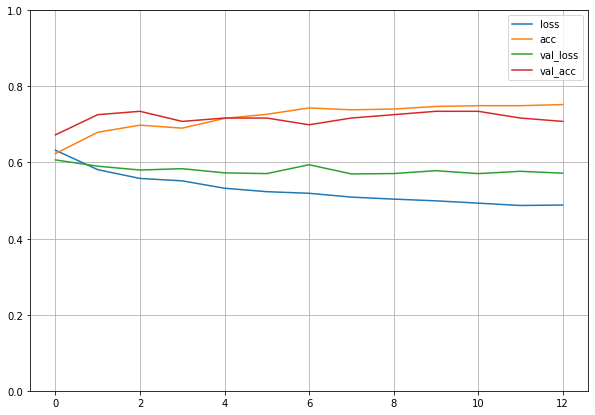

In [34]:
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.axial , processing.meniscal )

In [35]:
processing.test_classifier(extractor_res, processing.load_model(processing.trans_resnet,processing.axial,processing.meniscal,processing.classifier ) ,processing.axial , processing.meniscal)

4/4 [==============================] - 0s 2ms/step - loss: 0.6296 - acc: 0.6500


[0.6295508146286011, 0.6499999761581421]

## Saggital Abnormal

Epoch 1/50
38/51 [=====================>........] - ETA: 0s - loss: 0.6368 - acc: 0.6697
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/sagittal_abnormal.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.5952 - acc: 0.7030 - val_loss: 0.4707 - val_acc: 0.8053
Epoch 2/50
37/51 [====================>.........] - ETA: 0s - loss: 0.4398 - acc: 0.8122
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.4338 - acc: 0.8092 - val_loss: 0.4431 - val_acc: 0.7876
Epoch 3/50
49/51 [===========================>..] - ETA: 0s - loss: 0.4033 - acc: 0.8102
Epoch 00003: val_acc improved from 0.80531 to 0.81416, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/sagittal_abnormal.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.4015 - acc: 0.8112 - val_loss: 0.4367 - val_acc: 0.8142
Epoch 4/50
51/51 [=================

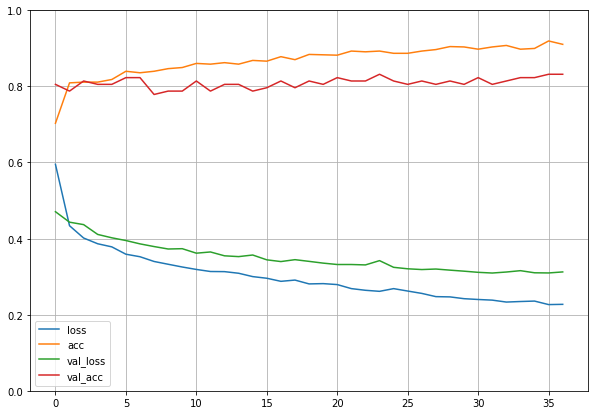

In [36]:
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.sagittal , processing.abnormal )

In [37]:
processing.test_classifier(extractor_res, processing.load_model(processing.trans_resnet,processing.sagittal,processing.abnormal,processing.classifier ) ,processing.sagittal , processing.abnormal)

4/4 [==============================] - 0s 2ms/step - loss: 0.3893 - acc: 0.8333


[0.3892797529697418, 0.8333333134651184]

## Saggital Acl

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.5072 - acc: 0.8112
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/sagittal_acl.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.5072 - acc: 0.8112 - val_loss: 0.4498 - val_acc: 0.8496
Epoch 2/50
41/51 [=======================>......] - ETA: 0s - loss: 0.4814 - acc: 0.8122
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.4804 - acc: 0.8112 - val_loss: 0.4430 - val_acc: 0.8496
Epoch 3/50
42/51 [=======================>......] - ETA: 0s - loss: 0.4659 - acc: 0.8060
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.4579 - acc: 0.8122 - val_loss: 0.4144 - val_acc: 0.8496
Epoch 4/50
39/51 [=====================>........] - ETA: 0s - loss: 0.4451 - acc: 0.8077
Epoch 00004: val_acc did not improve from 0.8495

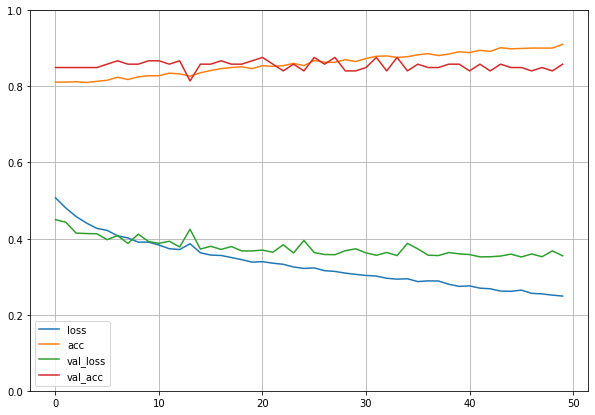

In [38]:
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.sagittal , processing.acl )

In [39]:
processing.test_classifier(extractor_res, processing.load_model(processing.trans_resnet,processing.sagittal,processing.acl,processing.classifier ) ,processing.sagittal , processing.acl)

4/4 [==============================] - 0s 3ms/step - loss: 0.6379 - acc: 0.7000


[0.6379034519195557, 0.699999988079071]

## Saggital Meniscal

Epoch 1/50
42/51 [=======================>......] - ETA: 0s - loss: 0.6893 - acc: 0.6452
Epoch 00001: val_acc improved from -inf to 0.62832, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/sagittal_meniscus.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.6828 - acc: 0.6352 - val_loss: 0.6777 - val_acc: 0.6283
Epoch 2/50
35/51 [===================>..........] - ETA: 0s - loss: 0.6168 - acc: 0.6671
Epoch 00002: val_acc improved from 0.62832 to 0.70796, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/sagittal_meniscus.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.6065 - acc: 0.6686 - val_loss: 0.6119 - val_acc: 0.7080
Epoch 3/50
50/51 [============================>.] - ETA: 0s - loss: 0.5797 - acc: 0.6890
Epoch 00003: val_acc did not improve from 0.70796
51/51 [==============================] - 0s 4ms/step - loss: 0.5835 - acc: 0.6844 - val_loss: 0.5965 - val_acc: 0.6903
Epoch 4/50
49/51 [=================

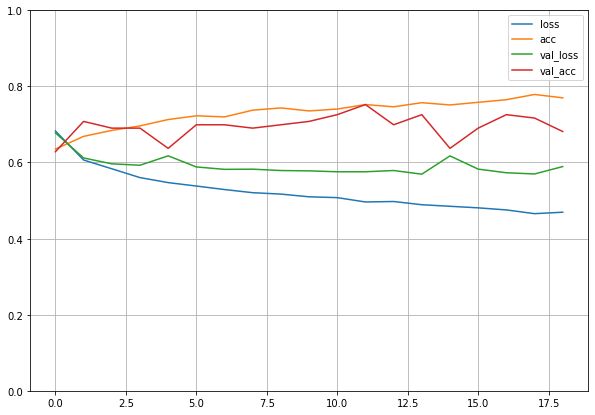

In [40]:
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.sagittal , processing.meniscal)

In [41]:
processing.test_classifier(extractor_res, processing.load_model(processing.trans_resnet,processing.sagittal,processing.meniscal,processing.classifier ) ,processing.sagittal , processing.meniscal)

4/4 [==============================] - 0s 3ms/step - loss: 0.6266 - acc: 0.6500


[0.6265714764595032, 0.6499999761581421]

## Coronal Abnormal

Epoch 1/50
40/51 [======================>.......] - ETA: 0s - loss: 0.5123 - acc: 0.7700
Epoch 00001: val_acc improved from -inf to 0.81416, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/coronal_abnormal.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.4968 - acc: 0.7797 - val_loss: 0.4790 - val_acc: 0.8142
Epoch 2/50
36/51 [====================>.........] - ETA: 0s - loss: 0.4486 - acc: 0.8097
Epoch 00002: val_acc improved from 0.81416 to 0.83186, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/coronal_abnormal.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.4268 - acc: 0.8161 - val_loss: 0.4594 - val_acc: 0.8319
Epoch 3/50
42/51 [=======================>......] - ETA: 0s - loss: 0.4108 - acc: 0.8167
Epoch 00003: val_acc did not improve from 0.83186
51/51 [==============================] - 0s 3ms/step - loss: 0.4042 - acc: 0.8181 - val_loss: 0.4457 - val_acc: 0.8319
Epoch 4/50
34/51 [===================

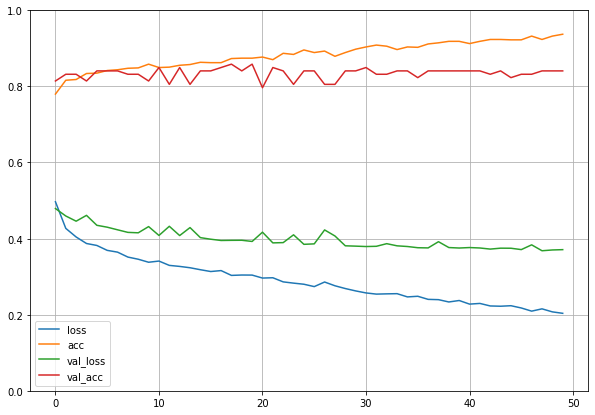

In [42]:
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.coronal , processing.abnormal )

In [43]:
processing.test_classifier(extractor_res, processing.load_model(processing.trans_resnet,processing.coronal,processing.abnormal,processing.classifier ) ,processing.coronal , processing.abnormal)

4/4 [==============================] - 0s 3ms/step - loss: 0.4217 - acc: 0.8167


[0.4216698706150055, 0.8166666626930237]

## Coronal Acl

Epoch 1/50
36/51 [====================>.........] - ETA: 0s - loss: 0.4789 - acc: 0.8181
Epoch 00001: val_acc improved from -inf to 0.82301, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/coronal_acl.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.4877 - acc: 0.8092 - val_loss: 0.4308 - val_acc: 0.8230
Epoch 2/50
41/51 [=======================>......] - ETA: 0s - loss: 0.4690 - acc: 0.8049
Epoch 00002: val_acc improved from 0.82301 to 0.84071, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/coronal_acl.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.4492 - acc: 0.8171 - val_loss: 0.4054 - val_acc: 0.8407
Epoch 3/50
50/51 [============================>.] - ETA: 0s - loss: 0.4329 - acc: 0.8210
Epoch 00003: val_acc did not improve from 0.84071
51/51 [==============================] - 0s 4ms/step - loss: 0.4348 - acc: 0.8191 - val_loss: 0.4031 - val_acc: 0.8319
Epoch 4/50
46/51 [==========================>..

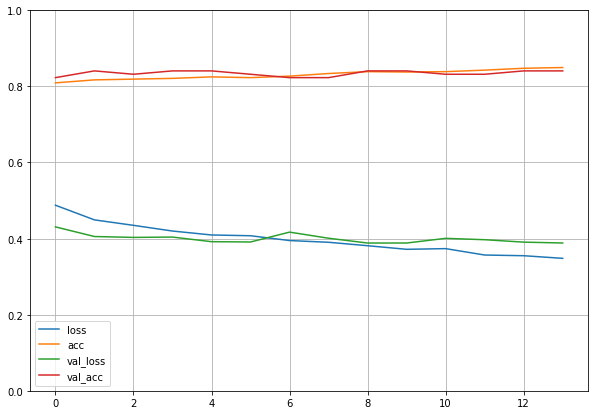

In [44]:
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.coronal , processing.acl )

In [45]:
processing.test_classifier(extractor_res, processing.load_model(processing.trans_resnet,processing.coronal,processing.acl,processing.classifier ) ,processing.coronal , processing.acl)

4/4 [==============================] - 0s 3ms/step - loss: 0.9154 - acc: 0.5500


[0.9154000878334045, 0.550000011920929]

## Coronal Meniscal

Epoch 1/50
49/51 [===========================>..] - ETA: 0s - loss: 0.6782 - acc: 0.6214
Epoch 00001: val_acc improved from -inf to 0.68142, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/coronal_meniscus.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.6737 - acc: 0.6264 - val_loss: 0.6257 - val_acc: 0.6814
Epoch 2/50
39/51 [=====================>........] - ETA: 0s - loss: 0.6160 - acc: 0.6603
Epoch 00002: val_acc did not improve from 0.68142
51/51 [==============================] - 0s 3ms/step - loss: 0.6056 - acc: 0.6726 - val_loss: 0.6070 - val_acc: 0.6637
Epoch 3/50
41/51 [=======================>......] - ETA: 0s - loss: 0.5769 - acc: 0.6890
Epoch 00003: val_acc improved from 0.68142 to 0.69912, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/coronal_meniscus.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.5777 - acc: 0.6932 - val_loss: 0.5950 - val_acc: 0.6991
Epoch 4/50
37/51 [===================

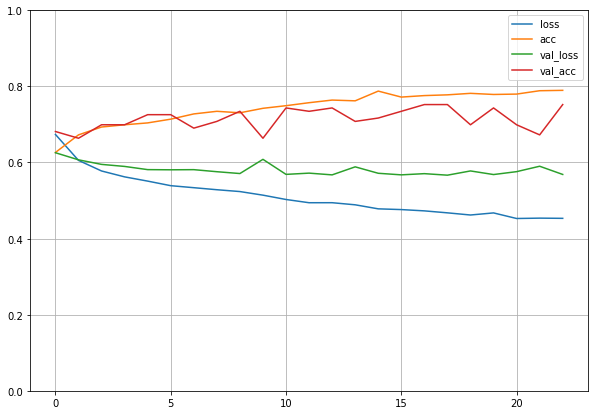

In [46]:
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.coronal , processing.meniscal)

In [47]:
processing.test_classifier(extractor_res, processing.load_model(processing.trans_resnet,processing.coronal,processing.meniscal,processing.classifier ) ,processing.coronal , processing.meniscal)

4/4 [==============================] - 0s 2ms/step - loss: 0.6235 - acc: 0.6500


[0.6234686970710754, 0.6499999761581421]

#Train Regressors

##Logistic Regressor

In [0]:
def regressor():  
  log_reg = keras.models.Sequential()
  log_reg.add(keras.layers.Dense(units=1 , activation = 'sigmoid' , input_dim = 3))
  log_reg.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(0.01),metrics=['acc'])
  return log_reg

###Abnormal

Epoch 1/50
47/51 [==========================>...] - ETA: 0s - loss: 0.4498 - acc: 0.8128
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/trans_ResNet/Regressor/abnormal.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.4508 - acc: 0.8083 - val_loss: 0.4353 - val_acc: 0.8053
Epoch 2/50
43/51 [========================>.....] - ETA: 0s - loss: 0.4055 - acc: 0.8035
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.4004 - acc: 0.8083 - val_loss: 0.4268 - val_acc: 0.8053
Epoch 3/50
41/51 [=======================>......] - ETA: 0s - loss: 0.3928 - acc: 0.8061
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.3871 - acc: 0.8083 - val_loss: 0.4171 - val_acc: 0.8053
Epoch 4/50
40/51 [======================>.......] - ETA: 0s - loss: 0.3677 - acc: 0.8188
Epoch 00004: val_acc did not improve from 0.80531
51/

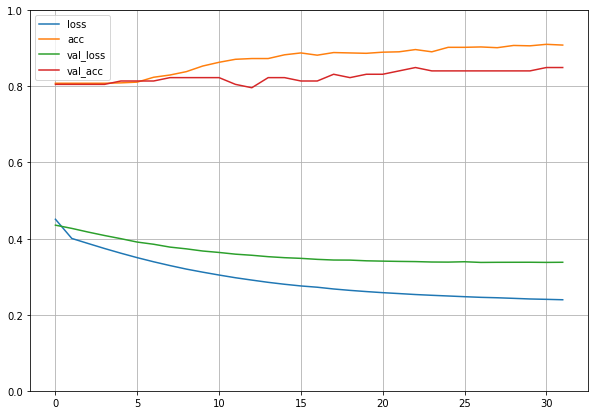

In [9]:
processing.train_regressor(regressor(),extractor_res,extractor_res,extractor_res,processing.trans_resnet,processing.abnormal)

In [10]:
processing.test_regressor(extractor_res,extractor_res,extractor_res,processing.trans_resnet,processing.abnormal)

4/4 [==============================] - 0s 3ms/step - loss: 0.3940 - acc: 0.8333


[0.39404281973838806, 0.8333333134651184]

###Acl

Epoch 1/50
47/51 [==========================>...] - ETA: 0s - loss: 0.6193 - acc: 0.8096
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/trans_ResNet/Regressor/acl.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.6137 - acc: 0.8122 - val_loss: 0.5283 - val_acc: 0.8496
Epoch 2/50
45/51 [=========================>....] - ETA: 0s - loss: 0.5472 - acc: 0.8122
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.5459 - acc: 0.8122 - val_loss: 0.4780 - val_acc: 0.8496
Epoch 3/50
48/51 [===========================>..] - ETA: 0s - loss: 0.5166 - acc: 0.8094
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.5128 - acc: 0.8122 - val_loss: 0.4558 - val_acc: 0.8496
Epoch 4/50
49/51 [===========================>..] - ETA: 0s - loss: 0.4918 - acc: 0.8112
Epoch 00004: val_acc did not improve from 0.84956
51/51 [=

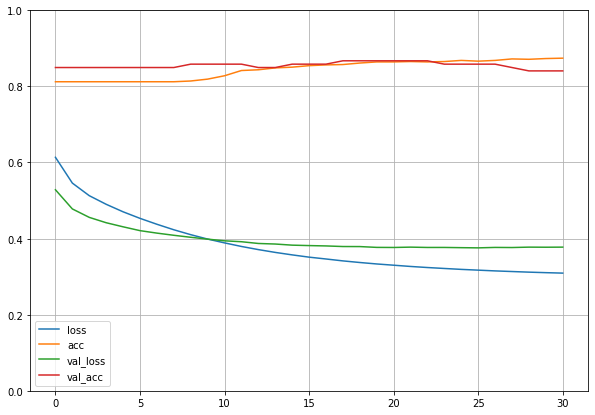

In [11]:
processing.train_regressor(regressor(),extractor_res,extractor_res,extractor_res,processing.trans_resnet,processing.acl)

In [12]:
processing.test_regressor(extractor_res,extractor_res,extractor_res,processing.trans_resnet,processing.acl)

4/4 [==============================] - 0s 3ms/step - loss: 0.6274 - acc: 0.6583


[0.6274384260177612, 0.6583333611488342]

###Meniscal

Epoch 1/50
48/51 [===========================>..] - ETA: 0s - loss: 0.6637 - acc: 0.6458
Epoch 00001: val_acc improved from -inf to 0.69027, saving model to /content/drive/My Drive/Models/trans_ResNet/Regressor/meniscus.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.6617 - acc: 0.6500 - val_loss: 0.6437 - val_acc: 0.6903
Epoch 2/50
47/51 [==========================>...] - ETA: 0s - loss: 0.6187 - acc: 0.7181
Epoch 00002: val_acc improved from 0.69027 to 0.71681, saving model to /content/drive/My Drive/Models/trans_ResNet/Regressor/meniscus.h5
51/51 [==============================] - 0s 3ms/step - loss: 0.6168 - acc: 0.7217 - val_loss: 0.6184 - val_acc: 0.7168
Epoch 3/50
45/51 [=========================>....] - ETA: 0s - loss: 0.5847 - acc: 0.7589
Epoch 00003: val_acc improved from 0.71681 to 0.75221, saving model to /content/drive/My Drive/Models/trans_ResNet/Regressor/meniscus.h5
51/51 [==============================] - 0s 3ms/step - loss: 0.5839 - acc: 0.7552 - val

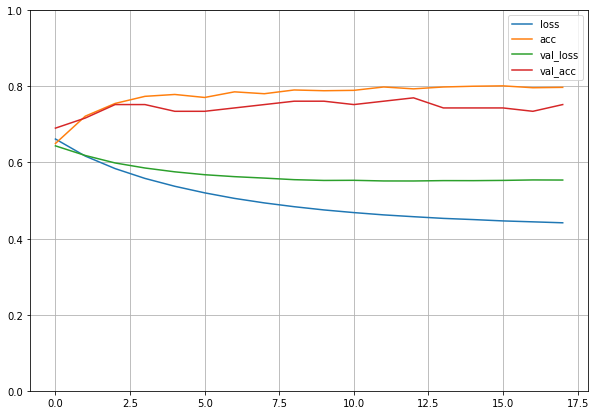

In [13]:
processing.train_regressor(regressor(),extractor_res,extractor_res,extractor_res,processing.trans_resnet,processing.meniscal)

In [14]:
processing.test_regressor(extractor_res,extractor_res,extractor_res,processing.trans_resnet,processing.meniscal)

4/4 [==============================] - 0s 2ms/step - loss: 0.5947 - acc: 0.7083


[0.5947383046150208, 0.7083333134651184]